# World Happiness Score Prediction Using Linear Regression and Random Forest Regressor

- Project Title : World Happiness Score Prediction Using Machine Learning
- Group Number : 65
- Group Members:
    - EG/2021/4599 - Karunarathna J. S.
    - EG/2021/4604 - Karunathilake A. D. H.

# Introduction

The World Happiness Report is an annual publication that measures the well-being and happiness of people across different countries. This dataset is derived from a global survey conducted by Gallup, where individuals are asked to evaluate their quality of life on a scale known as the "Cantril Ladder." The scores range from 0 (the worst possible life) to 10 (the best possible life). The report also examines how various factors such as economic production, social support, life expectancy, freedom, generosity, and absence of corruption contribute to happiness across nations.

In this project, the goal is to build a machine learning model that predicts the happiness score for each country based on these contributing factors. Understanding the correlation between these factors and the happiness score can help policymakers and organizations devise strategies to improve the well-being of their citizens. By predicting happiness scores accurately, we aim to uncover deeper insights into the elements that drive happiness and assess their relative importance in global well-being.

# Literature Survey
The concept of measuring happiness on a global scale has gained significant attention from policymakers and researchers over the past decade. The **World Happiness Report**, first published in 2012, has become a major reference for understanding well-being trends globally. The report uses data from Gallup’s World Poll to assess life satisfaction and factors influencing happiness. Each year, economists and psychologists examine these reports to offer guidance on improving well-being through data-driven insights.

Several studies have explored the relationship between economic and social factors and happiness. For example, *Easterlin (1974)* introduced the **Easterlin Paradox**, which shows that while richer nations tend to report higher happiness scores, there is no clear link between income growth and long-term increases in happiness. More recently, research has turned towards evaluating non-economic factors such as **social support, mental health, and community engagement** as stronger indicators of well-being (*Layard, 2005*).

Machine learning techniques have also been applied to predict happiness scores, often using models like **linear regression**, **decision trees**, and **random forests**. These models attempt to correlate measurable national indicators, such as GDP per capita or life expectancy, with the reported happiness scores. Studies indicate that while economic factors like GDP per capita have a notable impact, factors like **freedom** and **corruption** play equally crucial roles in explaining variations in happiness across countries (*Helliwell et al., 2020*).

In this project, by leveraging the World Happiness dataset, we seek to build a machine learning model that captures the relationships between these contributing factors and predicts happiness scores for countries globally. This model can further highlight which variables are most influential in driving national happiness, offering valuable insights for global well-being policies.

# Dataset Description
Link to dataset: https://www.kaggle.com/datasets/unsdsn/world-happiness/data

The dataset used in this project is sourced from the **World Happiness Report** and includes data for the years 2015 to 2019, covering over 150 countries. It is composed of multiple columns that represent both the happiness score and the contributing factors to each country's score. The primary columns are:

- **Country**: The name of the country.
- **Happiness Score**: A score between 0 and 10, representing the average Cantril Ladder score based on survey responses.
- **GDP per Capita**: The contribution of a country's economic output to its happiness.
- **Social Support (Family)**: The extent of social support and familial relationships.
- **Life Expectancy**: The health and longevity of the population.
- **Freedom**: The freedom individuals feel in making life choices.
- **Generosity**: The perceived generosity in the country.
- **Trust (Government Corruption)**: The level of trust in the government and perceptions of corruption.
- **Dystopia Residual**: A metric combining a hypothetical "Dystopia" score and residual errors from the model. It helps to establish a lower-bound reference for the happiness score.

### Dataset Fields:
| Column Name           | Description                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| **Country**            | Name of the country                                                         |
| **Happiness Score**    | The Cantril ladder score for the country (0 to 10)                           |
| **GDP per Capita**     | The economic contribution to happiness                                      |
| **Family**             | Represents social support within the country                                |
| **Life Expectancy**    | Health metric based on average life expectancy                              |
| **Freedom**            | The perceived freedom to make life choices                                  |
| **Generosity**         | The country's generosity as measured by charitable giving                   |
| **Trust (Government Corruption)** | Perceptions of corruption in the government                      |
| **Dystopia Residual**  | The unexplained component of the happiness score, using Dystopia as a base   |

The happiness score is calculated as the sum of these contributing factors, and it represents a holistic assessment of a nation’s happiness. Each factor quantifies the impact of different social, economic, and health-related aspects on the overall happiness of a country’s citizens.

This dataset provides an excellent opportunity to explore the relationships between these factors using machine learning models to predict happiness scores. Understanding the relative contribution of each factor to happiness can offer valuable insights into global well-being trends.

# Data Preprocessing before EDA

### Import Libraries
For visualization and statistics we first import necessary libraries

In [82]:
# For visualization and statistics we first import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Import Dataframes and Inspect the features
Next we import datasets from all 5 years into pandas dataframes separately.

In [83]:
# Load datasets from 2015 to 2019
df_2015 = pd.read_csv("2015.csv")
df_2016 = pd.read_csv("2016.csv")
df_2017 = pd.read_csv("2017.csv")
df_2018 = pd.read_csv("2018.csv")
df_2019 = pd.read_csv("2019.csv")

# Print columns of each dataframe to inspect the features
print("2015 Dataset Columns: ", df_2015.columns)
print("2016 Dataset Columns: ", df_2016.columns)
print("2017 Dataset Columns: ", df_2017.columns)
print("2018 Dataset Columns: ", df_2018.columns)
print("2019 Dataset Columns: ", df_2019.columns)


2015 Dataset Columns:  Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 Dataset Columns:  Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017 Dataset Columns:  Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 Dataset Columns:  Index(['Overall rank', 'Country or region'

We can see that for some years, there are many features and for some years it's not. And also for same thing different years have different column titles as well. Therefore, before proceeding further we need to standardize column names and remove unnecessary features as well. 

In [84]:
# Rename column names for standardize
df_2015.rename(columns={
    'Happiness Score': 'Score',
    'Economy (GDP per Capita)': 'Economy',
    'Family': 'Social support',
    'Health (Life Expectancy)': 'Life expectancy',
    'Trust (Government Corruption)': 'Perceptions of corruption',
}, inplace=True)

df_2016.rename(columns={
    'Happiness Score': 'Score',
    'Economy (GDP per Capita)': 'Economy',
    'Family': 'Social support',
    'Health (Life Expectancy)': 'Life expectancy',
    'Trust (Government Corruption)': 'Perceptions of corruption',
}, inplace=True)

df_2017.rename(columns={
    'Happiness.Score': 'Score',
    'Economy..GDP.per.Capita.': 'Economy',
    'Family': 'Social support',
    'Health..Life.Expectancy.': 'Life expectancy',
    'Trust..Government.Corruption.': 'Perceptions of corruption',
    'Dystopia.Residual': 'Dystopia Residual',
}, inplace=True)

df_2018.rename(columns={
    'Country or region': 'Country',
    'GDP per capita': 'Economy',
    'Healthy life expectancy': 'Life expectancy',
    'Freedom to make life choices': 'Freedom'
}, inplace=True)

df_2019.rename(columns={
    'Country or region': 'Country',
    'GDP per capita': 'Economy',
    'Healthy life expectancy': 'Life expectancy',
    'Freedom to make life choices': 'Freedom'
}, inplace=True)

# Print out the column names again to confirm consistency
print("2015 Dataset Columns: ", df_2015.columns)
print("2016 Dataset Columns: ", df_2016.columns)
print("2017 Dataset Columns: ", df_2017.columns)
print("2018 Dataset Columns: ", df_2018.columns)
print("2019 Dataset Columns: ", df_2019.columns)

2015 Dataset Columns:  Index(['Country', 'Region', 'Happiness Rank', 'Score', 'Standard Error',
       'Economy', 'Social support', 'Life expectancy', 'Freedom',
       'Perceptions of corruption', 'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 Dataset Columns:  Index(['Country', 'Region', 'Happiness Rank', 'Score',
       'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy',
       'Social support', 'Life expectancy', 'Freedom',
       'Perceptions of corruption', 'Generosity', 'Dystopia Residual'],
      dtype='object')
2017 Dataset Columns:  Index(['Country', 'Happiness.Rank', 'Score', 'Whisker.high', 'Whisker.low',
       'Economy', 'Social support', 'Life expectancy', 'Freedom', 'Generosity',
       'Perceptions of corruption', 'Dystopia Residual'],
      dtype='object')
2018 Dataset Columns:  Index(['Overall rank', 'Country', 'Score', 'Economy', 'Social support',
       'Life expectancy', 'Freedom', 'Generosity',
       'Perceptions of corruption'],

Now we have consistent column names for all five years of data sets. But we need to remove the unnecessary columns like Standard Error in 2015 data set, Region, Whisker.low Whisker.high etc.

In [85]:
# Drop unnecessary columns from 2015 dataset
df_2015.drop(columns=['Happiness Rank','Region', 'Standard Error', 'Dystopia Residual'], inplace=True)

# Drop unnecessary columns from 2016 dataset
df_2016.drop(columns=['Happiness Rank','Region','Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'], inplace=True)

# Drop unnecessary columns from 2017 dataset
df_2017.drop(columns=['Happiness.Rank','Whisker.high', 'Whisker.low', 'Dystopia Residual'], inplace=True)

# Drop unwanted columns in 2018 and 2019
df_2018.drop(columns=['Overall rank'], inplace=True)
df_2019.drop(columns=['Overall rank'], inplace=True)

In [86]:
# Print out the column names again to confirm consistency
print("2015 Dataset Columns: ", df_2015.columns)
print("2016 Dataset Columns: ", df_2016.columns)
print("2017 Dataset Columns: ", df_2017.columns)
print("2018 Dataset Columns: ", df_2018.columns)
print("2019 Dataset Columns: ", df_2019.columns)

2015 Dataset Columns:  Index(['Country', 'Score', 'Economy', 'Social support', 'Life expectancy',
       'Freedom', 'Perceptions of corruption', 'Generosity'],
      dtype='object')
2016 Dataset Columns:  Index(['Country', 'Score', 'Economy', 'Social support', 'Life expectancy',
       'Freedom', 'Perceptions of corruption', 'Generosity'],
      dtype='object')
2017 Dataset Columns:  Index(['Country', 'Score', 'Economy', 'Social support', 'Life expectancy',
       'Freedom', 'Generosity', 'Perceptions of corruption'],
      dtype='object')
2018 Dataset Columns:  Index(['Country', 'Score', 'Economy', 'Social support', 'Life expectancy',
       'Freedom', 'Generosity', 'Perceptions of corruption'],
      dtype='object')
2019 Dataset Columns:  Index(['Country', 'Score', 'Economy', 'Social support', 'Life expectancy',
       'Freedom', 'Generosity', 'Perceptions of corruption'],
      dtype='object')


In the 5 years of data sets we only have limited number of records for one year. As a example for 2015, we have only 158 records. for 2016 we have only 157 records and for 2017, 2018 and 2019, we have 155, 156 and 156 records. It's hard to train a model for such a small data set because the model may not be able to capture the relations of the data. because of that we decided to merge all 5 years of data into one dataframe. 

In [87]:
# Merge all datasets
df_combined = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019])

# Reset index after merging
df_combined.reset_index(drop=True, inplace=True)

# Check the shape and first few rows of the combined dataset
print("Combined Dataset Shape:", df_combined.shape)
print(df_combined.head())

Combined Dataset Shape: (782, 8)
       Country  Score  Economy  Social support  Life expectancy  Freedom  \
0  Switzerland  7.587  1.39651         1.34951          0.94143  0.66557   
1      Iceland  7.561  1.30232         1.40223          0.94784  0.62877   
2      Denmark  7.527  1.32548         1.36058          0.87464  0.64938   
3       Norway  7.522  1.45900         1.33095          0.88521  0.66973   
4       Canada  7.427  1.32629         1.32261          0.90563  0.63297   

   Perceptions of corruption  Generosity  
0                    0.41978     0.29678  
1                    0.14145     0.43630  
2                    0.48357     0.34139  
3                    0.36503     0.34699  
4                    0.32957     0.45811  


So now we have 782 data points with 7 features and target.

# Exploratory Data Analysis

To avoid data snooping, it's better to split the data set first

In [88]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features and target
X = df_combined.drop(columns=['Score','Country'])  # Adjust target column name if necessary
y = df_combined['Score']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes of the splits
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (625, 6), Test shape: (157, 6)


1. Summery Statistics

In [89]:
# Summary statistics
print("Dataset Summary:\n")
print(df_combined.describe())

Dataset Summary:

            Score     Economy  Social support  Life expectancy     Freedom  \
count  782.000000  782.000000      782.000000       782.000000  782.000000   
mean     5.379018    0.916047        1.078392         0.612416    0.411091   
std      1.127456    0.407340        0.329548         0.248309    0.152880   
min      2.693000    0.000000        0.000000         0.000000    0.000000   
25%      4.509750    0.606500        0.869363         0.440183    0.309768   
50%      5.322000    0.982205        1.124735         0.647310    0.431000   
75%      6.189500    1.236187        1.327250         0.808000    0.531000   
max      7.769000    2.096000        1.644000         1.141000    0.724000   

       Perceptions of corruption  Generosity  
count                 781.000000  782.000000  
mean                    0.125436    0.218576  
std                     0.105816    0.122321  
min                     0.000000    0.000000  
25%                     0.054000    0.130000

- By summery statistics we can see that Perceptions of corruption is missing a value. Let's recheck whether dataset have a null value.

In [90]:
# Check for null values
print("Missing Values:\n")
print(df_combined.isnull().sum())

Missing Values:

Country                      0
Score                        0
Economy                      0
Social support               0
Life expectancy              0
Freedom                      0
Perceptions of corruption    1
Generosity                   0
dtype: int64


- Perceptions of corruption definitely have a null value. So we will treat it in the data preprocessing section.

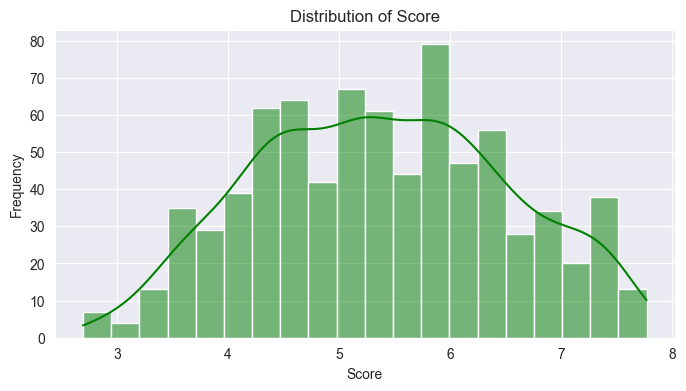

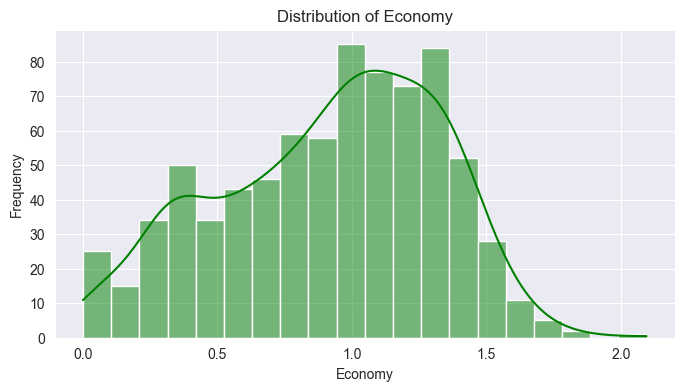

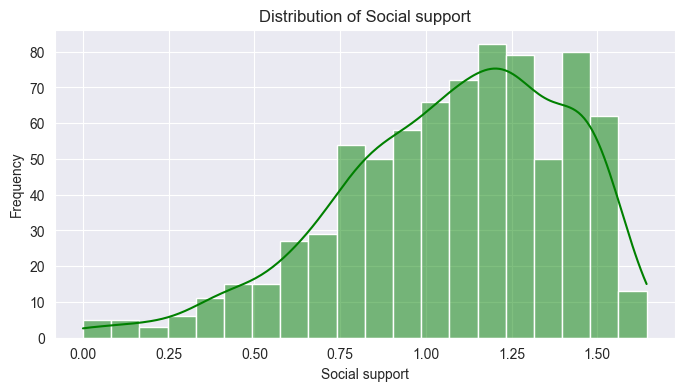

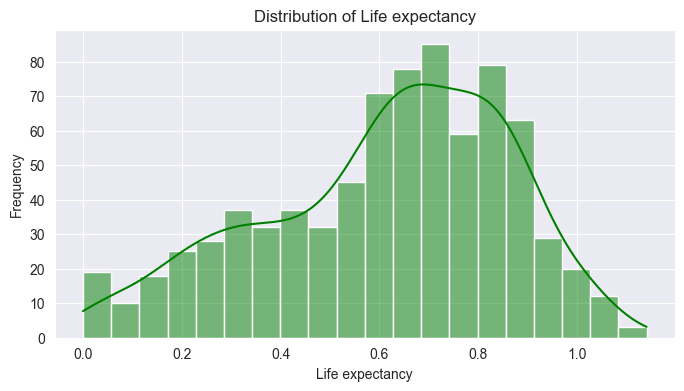

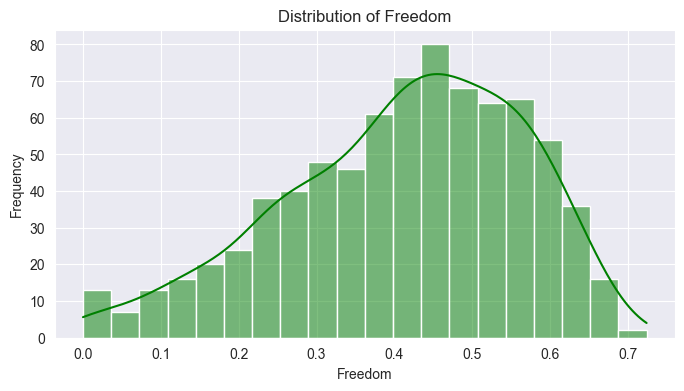

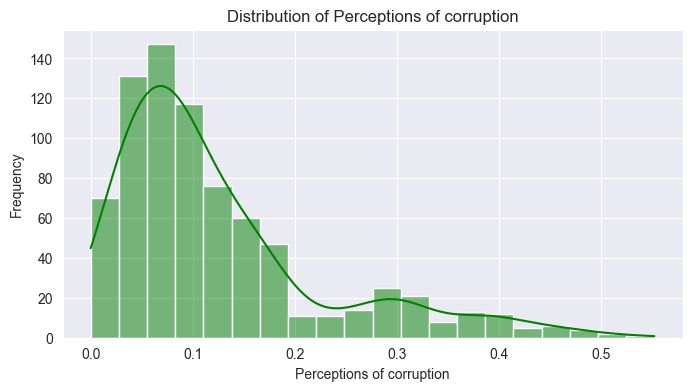

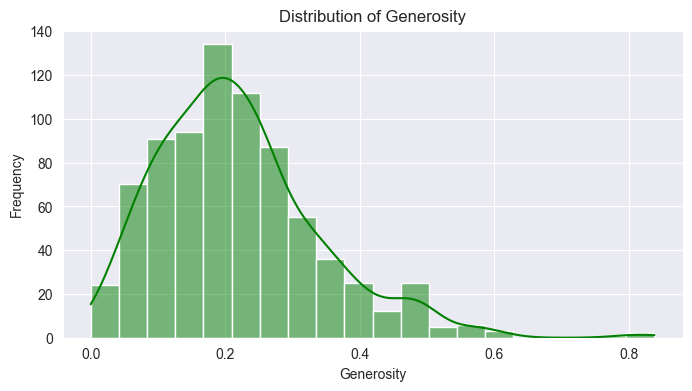

In [91]:
# Histogram for each numeric column
numeric_features = ['Score', 'Economy', 'Social support', 'Life expectancy', 'Freedom', 
                    'Perceptions of corruption', 'Generosity']
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_combined[feature], kde=True, bins=20, color='green')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


We can see that some of the features are not distributes evenly, therefore we need to employ standard scaler in the data preprocessing section.

In [92]:
# Combine X_train and y_train for correlation analysis
train_data = X_train.copy()
train_data['Score'] = y_train  # Add the target column back for correlation

# Compute correlations
correlation = train_data.corr()
score_corr = correlation['Score'].sort_values(ascending=False)
print("Correlation of Features with Score:")
print(score_corr)


Correlation of Features with Score:
Score                        1.000000
Economy                      0.789818
Life expectancy              0.749292
Social support               0.644567
Freedom                      0.577345
Perceptions of corruption    0.440343
Generosity                   0.156041
Name: Score, dtype: float64


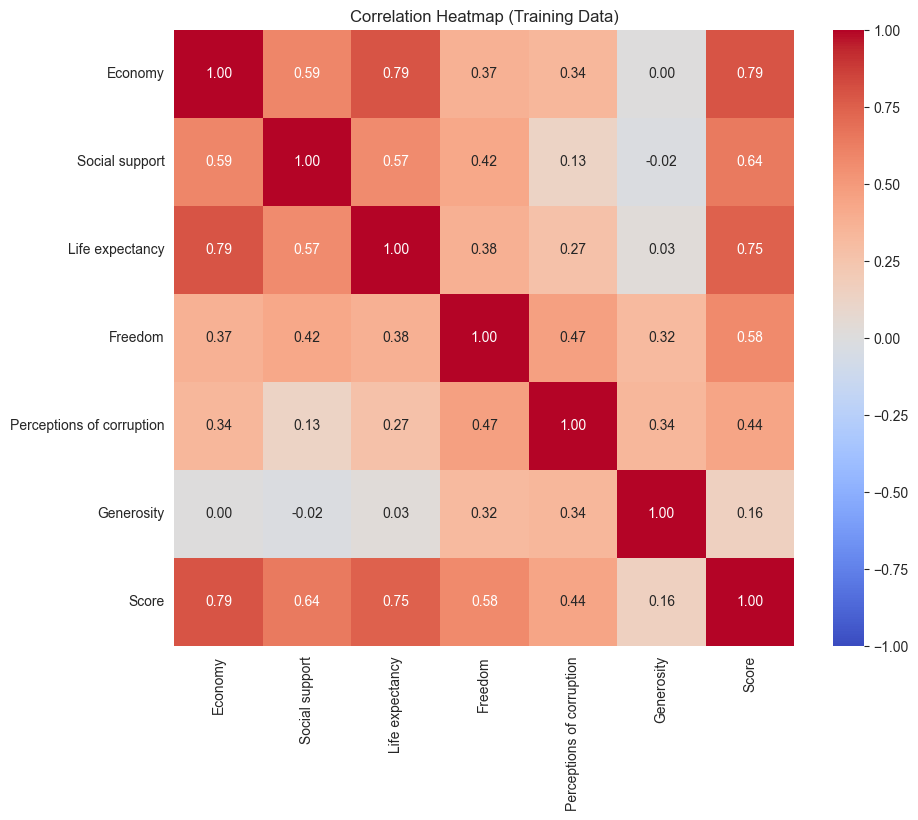

In [93]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Training Data)')
plt.show()

It is obvious that other than Generosity, all other features have significant positive correlation with the target 'Score'

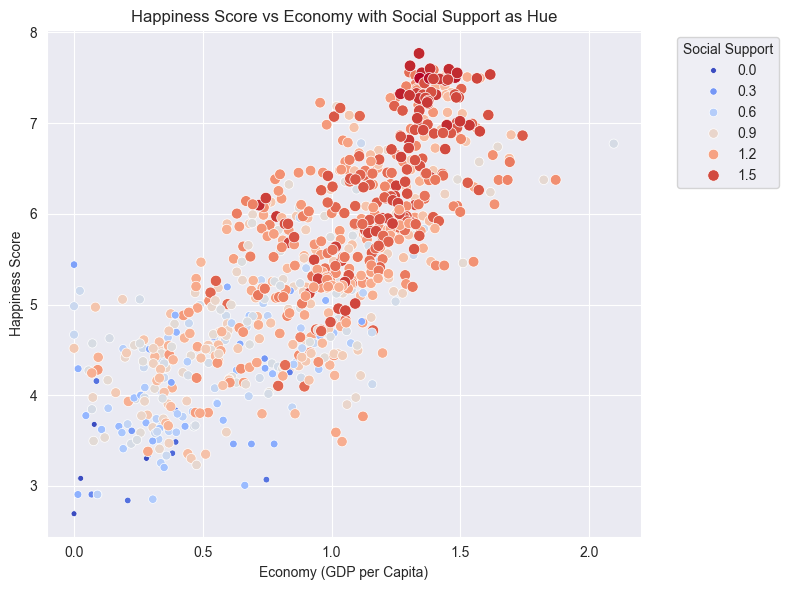

In [94]:
# Scatterplot
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    data=df_combined, 
    x='Economy', 
    y='Score', 
    hue='Social support', 
    palette='coolwarm', 
    size='Social support', 
)

# Adding titles and labels
plt.title('Happiness Score vs Economy with Social Support as Hue')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')

# Legend for hue
plt.legend(title='Social Support', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

From above scatter plot we can see our hypothesis about the importance of economy. And also not only economy, we can see that non-economic factors like social support a;so significantly contribute to the happiness score.

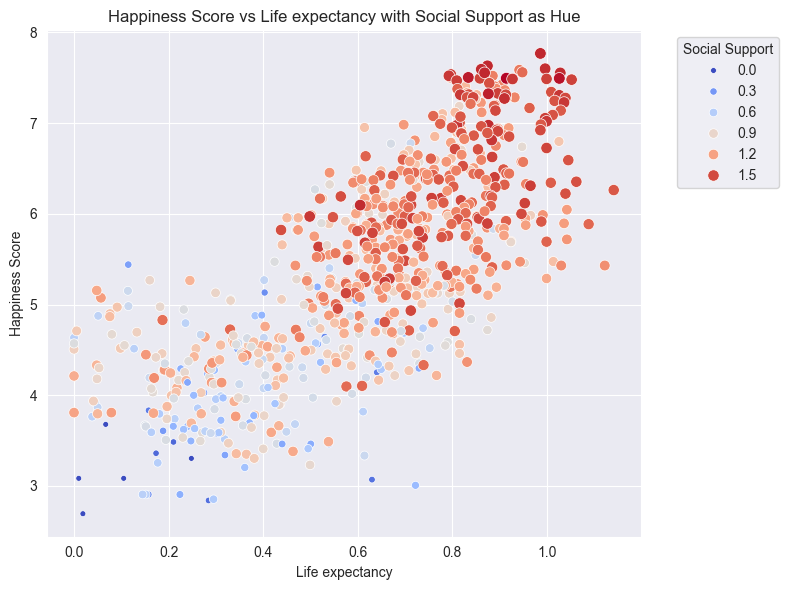

In [95]:
# Scatterplot
plt.figure(figsize=(8, 6))
scatter2 = sns.scatterplot(
    data=df_combined, 
    x='Life expectancy', 
    y='Score', 
    hue='Social support', 
    palette='coolwarm', 
    size='Social support', 
)

# Adding titles and labels
plt.title('Happiness Score vs Life expectancy with Social Support as Hue')
plt.xlabel('Life expectancy')
plt.ylabel('Happiness Score')

# Legend for hue
plt.legend(title='Social Support', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

And from above plot we can see that the social support is highly affecting the life expectancy as well as the happiness score of a individual.

# Data Pre Processing

In [96]:
X_train.shape

(625, 6)

In [97]:
X_train.columns

Index(['Economy', 'Social support', 'Life expectancy', 'Freedom',
       'Perceptions of corruption', 'Generosity'],
      dtype='object')

In EDA, we found one null value in the Perceptions of corruption feature. So let's impute it with the mean imputation.

1. Handling missing values

In [98]:
from sklearn.impute import SimpleImputer
# Using SimpleImputer to fill missing values in 'Perceptions of corruption' column with mean
imputer = SimpleImputer(strategy='mean')
X_train['Perceptions of corruption'] = imputer.fit_transform(X_train[['Perceptions of corruption']])

Let's check again for null values

In [99]:
# Check for null values
print("Missing Values:\n")
print(X_train.isnull().sum())

Missing Values:

Economy                      0
Social support               0
Life expectancy              0
Freedom                      0
Perceptions of corruption    0
Generosity                   0
dtype: int64


Now we don't have any null values.

2.Using Standard Scaler

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
print(X_train_scaled_df.head())

    Economy  Social support  Life expectancy   Freedom  \
0 -0.459626       -1.017018        -0.501150  0.822553   
1  0.244850        0.081466         0.638996 -0.699790   
2 -0.239036       -0.613979        -0.560447  0.884850   
3  0.571658        0.544270         0.496381 -1.303490   
4 -1.340342        0.044334        -1.461093 -0.045939   

   Perceptions of corruption  Generosity  
0                  -0.317122   -0.398504  
1                  -1.109223   -0.821418  
2                  -0.086203   -0.040081  
3                  -1.094279   -1.564862  
4                  -0.260732   -0.718954  


# Model Implementation

1. Linear Regression Model Implementation

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)

LR_train_score = linear_regressor.score(X_train_scaled,y_train)
print("Trained Linear Regression model score",LR_train_score)


Trained Linear Regression model score 0.7710623468512149


2. Random FOrest Regressor Model Implementation

In [102]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_regressor.fit(X_train_scaled, y_train)
RF_train_score = rf_regressor.score(X_train_scaled,y_train)
print("Trained Random Forest model score",RF_train_score)


Trained Random Forest model score 0.9726136318201941


# Model Evaluation and Discussion

For model evaluation we can use evaluation metrics like R2-score , Mean squared error, Root mean squared error etc.

1. R2 score 

In [103]:
# for linear regressor

LR_score = linear_regressor.score(X_test_scaled, y_test)

# for random forest regressor
RF_score = rf_regressor.score(X_test_scaled, y_test)

print("R2 score of linear regressor", LR_score)
print("R2 score of random forest regressor", RF_score)


R2 score of linear regressor 0.7289930162383139
R2 score of random forest regressor 0.7879583786218958


2.MSE - Mean Squared Error

In [104]:
# for linear regression
y_pred1 = linear_regressor.predict(X_test_scaled)
mse_reg = mean_squared_error(y_test, y_pred1)
print("MSE of linear regressor", mse_reg)

# for random forest regressor
y_pred2 = rf_regressor.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred2)
print("MSE of random forest regressor", mse_rf)

MSE of linear regressor 0.3296469920308326
MSE of random forest regressor 0.2579228095985134


3.RMSE - Root Mean Squared Error

In [105]:
from sklearn.metrics import root_mean_squared_error

# for linear regression model
rmse_reg = root_mean_squared_error(y_test, y_pred1)
print("RMSE of linear regressor", rmse_reg)

# for random forest regressor model
rmse_rf = root_mean_squared_error(y_test, y_pred2)
print("RMSE of random forest regressor", rmse_rf)

RMSE of linear regressor 0.5741489284417699
RMSE of random forest regressor 0.5078610140565166


4.MAE - Mean Absolute Error

In [106]:
from sklearn.metrics import mean_absolute_error
# for linear regression
mae_reg = mean_absolute_error(y_test, y_pred1)
print("MAE of linear regressor", mae_reg)

# for random forest regression
mae_rf = mean_absolute_error(y_test, y_pred2)
print("MAE of random forest regressor", mae_rf)

MAE of linear regressor 0.4415375445571439
MAE of random forest regressor 0.3929913970192198


on average linear regression model misses the correct value by 0.4415 and random forest regressor misses the correct value by 0.3929

We can see that without any hyperparameter tuning or feature engineering the linear regression model got 0.72 r2 score and random forest regressor got 0.78 r2 score. But we can add some polynomial features to capture non-linear relationships.

Feature Engineering and Ridge Regression check for improve Linear regression model performance

In [107]:
# polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


linear_regressor.fit(X_train_poly, y_train)
y_pred_poly = linear_regressor.predict(X_test_poly)

# Evaluating the model
poly_score = r2_score(y_test, y_pred_poly)
print(f"R2 Score for linear regression with Polynomial Features: {poly_score}")



R2 Score for linear regression with Polynomial Features: 0.7373383693956318


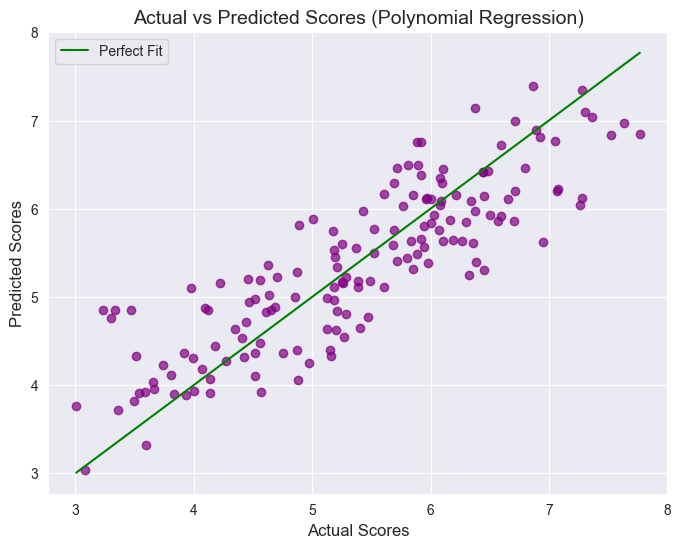

In [108]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.7, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='g', label='Perfect Fit')

# Add labels and title
plt.xlabel('Actual Scores', fontsize=12)
plt.ylabel('Predicted Scores', fontsize=12)
plt.title('Actual vs Predicted Scores (Polynomial Regression)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


In [109]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=2.0)  
ridge.fit(X_train_scaled, y_train)
ridge_score = ridge.score(X_test_scaled, y_test)
print(f"R2 Score with Ridge Regression: {ridge_score}")


R2 Score with Ridge Regression: 0.728764974673477


Hyper parameter tuning and Increase the number of estimators for Random forest regressor

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define the parameter grid with additional tuning suggestions
param_grid = {
    'n_estimators': [100, 200, 300],  # Consider a wider range of trees
    'max_depth': [10, 20, 30, None],  # Limit depth or allow unbounded trees
    'min_samples_split': [10, 15, 20],  # Larger split size to avoid overfitting
    'min_samples_leaf': [2, 4, 6],  # Increase minimum samples per leaf
    'max_features': ['sqrt', 'log2', None]  # Reduce features considered at each split
}

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best Parameters and Score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation R2 Score: {grid_search.best_score_}")

# Use the best model for prediction
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)
best_rf_score = r2_score(y_test, y_pred_best_rf)

# Final R2 Score
print(f"R2 Score with Best Random Forest Model on Test Set: {best_rf_score}")


E:\python\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation R2 Score: 0.7960596550030603
R2 Score with Best Random Forest Model on Test Set: 0.7775562242241185


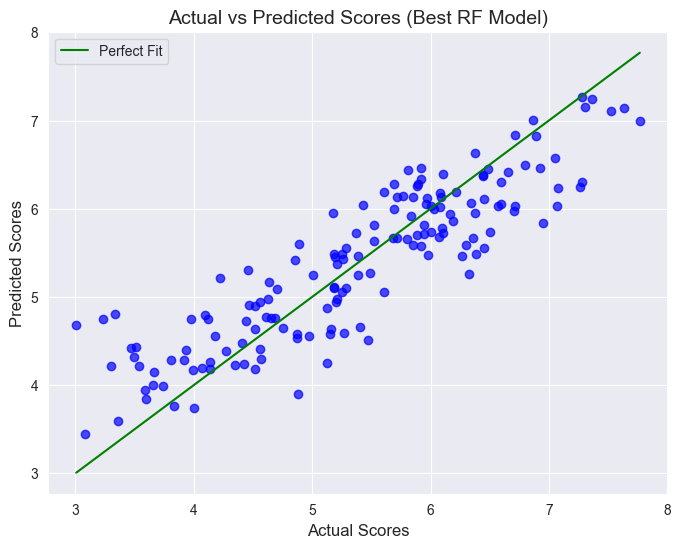

In [111]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.7, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='g', label='Perfect Fit')

# Add labels and title
plt.xlabel('Actual Scores', fontsize=12)
plt.ylabel('Predicted Scores', fontsize=12)
plt.title('Actual vs Predicted Scores (Best RF Model)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


Although we used the grid search, the R2 score we got is less than the regular random forest model. Therefore, we cross validate the random forest regressor

In [112]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_regressor, X_train_scaled, y_train, cv=10, scoring='r2', n_jobs=-1)
print(f"Cross-Validated R2 Scores: {cv_scores}")
print(f"Mean R2 Score: {cv_scores.mean()}")


Cross-Validated R2 Scores: [0.81653364 0.83025132 0.65705741 0.80153996 0.82335938 0.79364138
 0.80707974 0.73071459 0.85214604 0.81218226]
Mean R2 Score: 0.7924505723649804


By cross validation we got a mean R2 score 0.79 which is grater than regular random forest regressor or tuned random forest regressor.

## Model Performance Analysis

### Overall Performance Metrics
The Random Forest Regressor demonstrated strong performance across multiple evaluation metrics:

1. **R-squared (R2) Scores**:
   - Training Set R2: 0.9726 (97.26%)
   - Initial Test Set R2: 0.7880 (78.80%)
   - Best Model Test Set R2: 0.7776 (77.76%)
   - Cross-Validated Mean R2: 0.7925 (79.25%)

2. **Error Metrics**:
   - Mean Squared Error (MSE): 0.2579
   - Root Mean Squared Error (RMSE): 0.5079
   - Mean Absolute Error (MAE): 0.3930

### Performance Interpretation

#### Strengths
1. **High Predictive Power**: The model explains approximately 79% of the variance in the target variable, which is considered very good performance.
2. **Consistent Performance**: Cross-validation scores show consistent results, ranging from 0.657 to 0.852, with a mean of 0.7925.
3. **Outperforms Linear Regression**: Significantly better R2 score and lower error metrics compared to the linear regression model.

#### Potential Concerns
1. **Slight Overfitting**: The training set R2 (0.9726) is notably higher than the test set R2 (0.7880), suggesting some overfitting.

### Hyperparameter Tuning
The Grid Search revealed optimal parameters:
- Number of Estimators: 200
- Max Depth: 20
- Max Features: 'sqrt'
- Minimum Samples Leaf: 2
- Minimum Samples Split: 10

These parameters help mitigate overfitting and improve generalization.

### Recommendations
1. **Cross-Validation**: The 10-fold cross-validation provides confidence in the model's generalizability.
2. **Further Improvements**:
   - Consider feature engineering
   - Explore ensemble methods
   - Investigate remaining unexplained variance

## Linear Regression Model Performance Analysis

### Performance Metrics
1. **Training Set R-squared**: 0.7711 (77.11%)
2. **Polynomial Features R2 Score**: 0.7373 (73.73%)
3. **Ridge Regression R2 Score**: 0.7288 (72.88%)

### Detailed Interpretation

#### Training Performance
- The linear regression model explains about 77.11% of the variance in the training data.
- This indicates a moderate fit, but suggests some complexity in the underlying data that a simple linear model might not fully capture.

#### Polynomial Features
- Adding polynomial features (degree 2) slightly reduced the R2 score to 0.7373.
- This suggests that the relationship between features might not be purely quadratic, or that introducing polynomial features led to some overfitting.

#### Ridge Regression
- The Ridge regression (with α=2.0) shows a similar performance to the base linear model.
- The slight reduction in R2 score indicates that the regularization is helping to prevent overfitting, but not dramatically changing the model's predictive power.



## Comparative Model Discussion and conclusion

### Linear Regression vs. Random Forest Regressor

#### Performance Comparison
1. **R2 Scores**:
   - Linear Regression: ~0.73
   - Random Forest Regressor: 0.79

2. **Error Metrics**:
   - Linear Regression MSE: Higher
   - Random Forest MSE: Lower

#### Key Observations
1. **Model Complexity**
   - Linear Regression assumes a linear relationship between features and target
   - Random Forest captures non-linear relationships and interactions between features

2. **Predictive Power**
   - Random Forest outperforms Linear Regression by approximately 6-7% in R2 score
   - This suggests the underlying data has non-linear patterns that Random Forest can better capture

3. **Model Characteristics**
   - Linear Regression: Simple, interpretable, but less flexible
   - Random Forest: More complex, less interpretable, but better at capturing intricate data patterns

### Recommendations
1. **Prefer Random Forest** for this dataset due to:
   - Higher predictive accuracy
   - Better handling of non-linear relationships
   - More robust performance across different subsets of data

2. **Consider Feature Engineering** for Linear Models:
   - Explore more sophisticated feature transformations
   - Investigate feature interactions
   - Use regularization techniques (Lasso, ElasticNet)

3. **Validation**
   - Continue cross-validation
   - Consider ensemble methods
   - Explore other advanced regression techniques

The Random Forest Regressor demonstrates superior performance, indicating the presence of non-linear relationships in your dataset. While Linear Regression provides a baseline, the Random Forest model offers more sophisticated and accurate predictions.


# References